<a href="https://colab.research.google.com/github/crislanecas/Challenge_setor_aereo/blob/main/Challenge_Final_Setor_A%C3%A9reo_(Sarah_Gilbert).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Squad Sarah Gilbert

* Brenda Ramos Bezerra
* Crislane Cristina Alves da Silva
* Gabrielle Adany da Silva Moura
* Juliana Falcão de Almeida
* Joyce Silveira dos Santos
* Marina Costa Maranhão Castro
* Nathally Coutinho Lopes Magalhães
* Sara da Silva Freire



# Desafio Final : Setor Aéreo

Suponha que você trabalha na área de dados de uma companhia aérea. O objetivo do
seu time de dados é trazer mais insights para o time de produtos sobre esse setor e
otimizar rotas de voo, de modo que a companhia aérea seja o mais eficiente possível.
Dado esse contexto, a sua equipe recebeu do time de operações dados históricos de
voos de 2018 a 2022. Na pasta: setor aéreo, vocês encontram os dados em arquivos
csvs ano a ano, um dicionário de dados e um arquivo csv com o de-para do código da
cia aérea e seu nome.
De posse dessas informações, o time de produtos e de operações solicitou a sua
equipe as seguintes perguntas a serem respondidas:

# Importação das bibliotecas

In [174]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Configurações de estilo e cor da biblioteca seaborn

In [175]:
# Controle de estilo dos gráficos.
sns.set_style("white")

In [176]:
# Paleta de cores dos gráficos.
sns.set_palette("CMRmap")

# Importação dos dados

In [177]:
# Importa parte da biblioteca do Google Colab para ter acesso ao Google Drive, utilizando o método mount().
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
# Cria um dataframe para receber os dados do arquivo CSV das companhias aéreas.
companhias = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Airlines.csv')

In [179]:
# Cria um dataframe para receber os dados do arquivo CSV com as informações de vôos por ano.
dados_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Sample_combined_flights_2018.csv')
dados_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Sample_combined_flights_2019.csv')
dados_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Sample_combined_flights_2020.csv')
dados_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Sample_combined_flights_2021.csv')
dados_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Desafios WoMakerCode/Dados/Setor Áereo/Sample_combined_flights_2022.csv')

# Visão geral dos dados

## Companhias aéras

In [180]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.
companhias

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1566,ZW,Air Wisconsin Airlines Corp
1567,ZX,Air Georgian
1568,ZX (1),Airbc Ltd.
1569,ZY,Atlantic Gulf Airlines


## Informações dos voos por ano

In [181]:
# Mostra a quantidade de linhas e colunas de cada dataframe.
print(f'Número de linas: {dados_2018.shape[0]} e número de colunas: {dados_2018.shape[1]}.')
print(f'Número de linas: {dados_2019.shape[0]} e número de colunas: {dados_2019.shape[1]}.')
print(f'Número de linas: {dados_2020.shape[0]} e número de colunas: {dados_2020.shape[1]}.')
print(f'Número de linas: {dados_2021.shape[0]} e número de colunas: {dados_2021.shape[1]}.')
print(f'Número de linas: {dados_2022.shape[0]} e número de colunas: {dados_2022.shape[1]}.')

Número de linas: 56826 e número de colunas: 62.
Número de linas: 80973 e número de colunas: 62.
Número de linas: 50564 e número de colunas: 62.
Número de linas: 63325 e número de colunas: 62.
Número de linas: 40423 e número de colunas: 62.


In [182]:
# Mostra o período de início e fim de cada dataframe.
print('Voos de %s até %s' %(dados_2018.FlightDate.min(), dados_2018.FlightDate.max()))
print('Voos de %s até %s' %(dados_2019.FlightDate.min(), dados_2019.FlightDate.max()))
print('Voos de %s até %s' %(dados_2020.FlightDate.min(), dados_2020.FlightDate.max()))
print('Voos de %s até %s' %(dados_2021.FlightDate.min(), dados_2021.FlightDate.max()))
print('Voos de %s até %s' %(dados_2022.FlightDate.min(), dados_2022.FlightDate.max()))

Voos de 2018-01-01 até 2018-12-31
Voos de 2019-01-01 até 2019-12-31
Voos de 2020-01-01 até 2020-12-31
Voos de 2021-01-01 até 2021-12-31
Voos de 2022-01-01 até 2022-07-31


In [183]:
# Cria uma lista com os DataFrames.
lista_dados = [dados_2018, dados_2019, dados_2020, dados_2021, dados_2022]

# Concatena todos os DataFrames em um único DataFrame.
dados_concatenado = pd.concat(lista_dados, ignore_index=True)

dados_concatenado.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,...,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,...,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,NaN,NaN,...,NaN,NaN,NaN,1605,NaN,NaN,NaN,1600-1659,2,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,...,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,...,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0


In [184]:
dados_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292111 entries, 0 to 292110
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               292111 non-null  int64  
 1   FlightDate                               292111 non-null  object 
 2   Airline                                  292111 non-null  object 
 3   Origin                                   292111 non-null  object 
 4   Dest                                     292111 non-null  object 
 5   Cancelled                                292111 non-null  bool   
 6   Diverted                                 292111 non-null  bool   
 7   CRSDepTime                               292111 non-null  int64  
 8   DepTime                                  284442 non-null  float64
 9   DepDelayMinutes                          284419 non-null  float64
 10  DepDelay                        

# Análise de companhias aéreas

## Questão 1 - Principais companhias

Quais são as principais companhias aéreas que mais voaram durante
cada ano?

In [185]:
# Calcula a quantidade de voos para cada companhia.
contagem_2018 = dados_2018.Airline.value_counts()
# Mosta os três primeiros maiores resultados.
top_2018 = contagem_2018.head(3)
top_2018

Southwest Airlines Co.    13494
United Air Lines Inc.      6264
SkyWest Airlines Inc.      5375
Name: Airline, dtype: int64

In [186]:
# Calcula a quantidade de voos para cada companhia.
contagem_2019 = dados_2019.Airline.value_counts()
# Mosta os três primeiros maiores resultados.
top_2019 = contagem_2019.head(3)
top_2019

Southwest Airlines Co.    13654
Delta Air Lines Inc.       9976
American Airlines Inc.     9602
Name: Airline, dtype: int64

In [187]:
# Calcula a quantidade de voos para cada companhia.
contagem_2020 = dados_2020.Airline.value_counts()
# Mosta os três primeiros maiores resultados.
top_2020 = contagem_2020.head(3)
top_2020

Southwest Airlines Co.    9661
SkyWest Airlines Inc.     5930
Delta Air Lines Inc.      5845
Name: Airline, dtype: int64

In [188]:
# Calcula a quantidade de voos para cada companhia.
contagem_2021 = dados_2021.Airline.value_counts()
# Mosta os três primeiros maiores resultados.
top_2021 = contagem_2021.head(3)
top_2021

Southwest Airlines Co.    10663
SkyWest Airlines Inc.      7546
Delta Air Lines Inc.       7483
Name: Airline, dtype: int64

In [189]:
# Calcula a quantidade de voos para cada companhia.
contagem_2022 = dados_2022.Airline.value_counts()
# Mosta os três primeiros maiores resultados.
top_2022 = contagem_2022.head(3)
top_2022

Southwest Airlines Co.    7289
Delta Air Lines Inc.      5202
American Airlines Inc.    4955
Name: Airline, dtype: int64

In [190]:
# Cria uma lista de DataFrames.
lista_dados = [dados_2018, dados_2019, dados_2020, dados_2021, dados_2022]

# Inicializa uma lista para armazenar os resultados.
resultados = []

# Itera sobre os DataFrames.
for ano, dados in zip(range(2018, 2023), lista_dados):
    # Calcula a frequencia para cada companhia.
    contagem = dados['Airline'].value_counts()

    # Obtenha os primeiros resultados mais frequentes.
    top = contagem.head(1)

    # Adiciona os resultados à lista.
    resultados.extend([
        {'Ano': ano, 'Posição': 1, 'Airline': top.index[0], 'Contagem': top.values[0]},
    ])

# Crie um DataFrame a partir dos resultados
resultado_companhias = pd.DataFrame(resultados)

# Exibe o resultado final.
resultado_companhias

,Ano,Posição,Airline,Contagem
0,2018,1,Southwest Airlines Co.,13494
1,2019,1,Southwest Airlines Co.,13654
2,2020,1,Southwest Airlines Co.,9661
3,2021,1,Southwest Airlines Co.,10663
4,2022,1,Southwest Airlines Co.,7289


In [191]:
# Cria uma lista com os DataFrames.
lista_dados = [dados_2018, dados_2019, dados_2020, dados_2021, dados_2022]

# Concatena todos os DataFrames em um único DataFrame.
dados_concatenado = pd.concat(lista_dados, ignore_index=True)

# Calcula a quantidade de voos para cada companhia.
contagem_geral = dados_concatenado.Airline.value_counts()

# Mosta a relação geral com os totais de voos de cada companhia.
contagem_geral

Southwest Airlines Co.                       54761
Delta Air Lines Inc.                         33117
SkyWest Airlines Inc.                        31471
American Airlines Inc.                       31455
United Air Lines Inc.                        23647
Republic Airlines                            12901
JetBlue Airways                              10996
Envoy Air                                    10472
Endeavor Air Inc.                            10094
Comair Inc.                                   9506
Alaska Airlines Inc.                          9026
Spirit Air Lines                              8312
Mesa Airlines Inc.                            7592
Frontier Airlines Inc.                        5755
Allegiant Air                                 4953
Horizon Air                                   4756
Capital Cargo International                   3910
Air Wisconsin Airlines Corp                   3774
ExpressJet Airlines Inc.                      3509
Hawaiian Airlines Inc.         

In [192]:
# Agrupa os dados das companhia aérea por ano e conta o número de voos.
voos_por_ano = dados_concatenado.groupby(['Year', 'Airline']).size().reset_index(name='NumVoos')

# Seleciona as três companhias aéreas mais ativas.
top3_companhias = voos_por_ano.groupby('Airline')['NumVoos'].sum().nlargest(3).index

# Filtra os dados para incluir apenas as três companhias aéreas mais ativas.
dados_top3 = voos_por_ano[voos_por_ano['Airline'].isin(top3_companhias)]

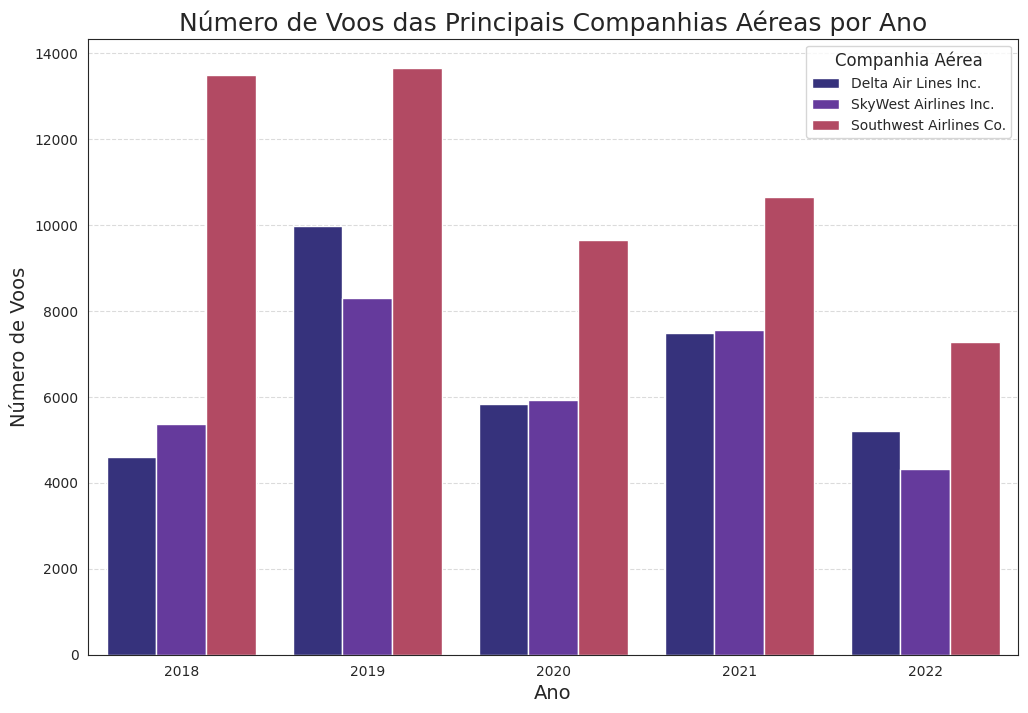

In [193]:
# Configura o tamanho da representação visual.
plt.figure(figsize=(12, 8))

# Cria um gráfico de colunas com os 5 anos e as 3 principais companhias.
ax = sns.barplot(x='Year', y='NumVoos', hue='Airline', data=dados_top3)

# Personalizações adicionais.
plt.title('Número de Voos das Principais Companhias Aéreas por Ano', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Voos', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Companhia Aérea', title_fontsize='12', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove informações da visualização.
plt.show()

Conclusão: A Southwest aparece em todos os anos com maior número de voos nos 5 anos consecutivos. Em um rank geral é possível observar que fez 54.761 voos, número esse que é 60% a mais que a Delta, a segunda colocada, com 33.117 voos.

## Questão 2 - Efeitos da pandemia

A pandemia afetou a operação de alguma delas? De que forma?


In [194]:
# Agrupa os dados por ano, companhia aérea e conta o número de voos
voos_por_ano = dados_concatenado.groupby(['Year']).size().reset_index(name='NumVoos')
voos_por_ano

,Year,NumVoos
0,2018,56826
1,2019,80973
2,2020,50564
3,2021,63325
4,2022,40423


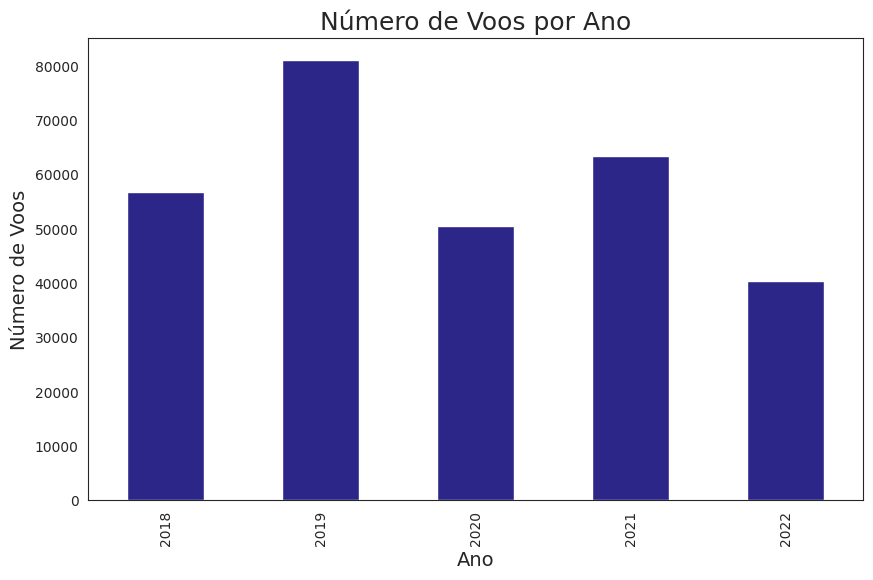

In [195]:
# Configura o tamanho da representação visual.
plt.figure(figsize=(10, 6))

# Cria um gráfico de colunas com os números de voos por ano.
voos_por_ano.groupby(['Year'])['NumVoos'].sum().plot(kind='bar')

# Personalizações adicionais.
plt.title('Número de Voos por Ano', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Voos', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove informações da visualização.
plt.show()

In [196]:
# Calculando a porcentagem de voos cancelados para cada ano.
percentual_cancelamentos_2018 = (dados_2018['Cancelled'].sum() / len(dados_2018)) * 100
percentual_cancelamentos_2020 = (dados_2020['Cancelled'].sum() / len(dados_2020)) * 100

# Exibindo os resultados
print(f"Porcentagem de cancelamentos em 2018: {percentual_cancelamentos_2018:.2f}%")
print(f"Porcentagem de cancelamentos em 2020: {percentual_cancelamentos_2020:.2f}%")

# Calculando a variação percentual
variacao_percentual_cancelamentos = ((percentual_cancelamentos_2020 - percentual_cancelamentos_2018) / percentual_cancelamentos_2018) * 100
print(f"Variação percentual na porcentagem de cancelamentos: {variacao_percentual_cancelamentos:.2f}%")

Porcentagem de cancelamentos em 2018: 1.54%
Porcentagem de cancelamentos em 2020: 6.11%
Variação percentual na porcentagem de cancelamentos: 296.62%


Conclusão: Podemos observar uma queda expressiva no número de voos em 2020 em comparação com o ano anterior. Importante ressaltar que os dados de 2022 não está completo, por este motivo o valor com relação ao anterior está baixo. Também houve um aumento no 296% nos números de cancelamentos.

## Questão 3 - Alteração nos voos

Quais as companhias que alteraram mais voos durante a pandemia?


In [197]:
# Filtra os dados para incluir apenas os voos durante o período de pandemia.
dados_pandemia = dados_2020[(dados_2020['FlightDate'] >= '2020-01-01') & (dados_2020['FlightDate'] <= '2022-12-31')]

# Agrupa os dados por companhia aérea.
grupo_companhia = dados_pandemia.groupby('Airline')

# Calcula o número de voos alterados para cada companhia aérea.
voos_alterados = grupo_companhia['Cancelled'].sum() + grupo_companhia['Diverted'].sum()

# Ordena as companhias aéreas pelo número de voos alterados em ordem decrescente.
companhias_alteradas = voos_alterados.sort_values(ascending=False)

# Exibe as companhias aéreas mais afetadas.
companhias_alteradas.head()

Airline
Southwest Airlines Co.    796
American Airlines Inc.    373
Delta Air Lines Inc.      302
SkyWest Airlines Inc.     289
United Air Lines Inc.     240
dtype: int64

Conclusão: Selecionando os voos cancelados e desviados, sendo possível identificar que as companhias Southwest, American Airlines e Delta, tiveram mais voos alterados no anos 2020, com destaque para Southwest com 796 e as duas últimas com números mais próximos de 373 e 302 respectivamente.

## Questão 4 - Principais companhias e rotas

Quais as principais rotas aéreas das principais companhias?

In [198]:
# Cria uma nova coluna 'Rota' concatenando a 'Origem' e 'Destino'.
dados_concatenado['Route'] = dados_concatenado['OriginCityName'] + ' - ' + dados_concatenado['DestCityName']

# Calcula a frequencia das rotas.
contagem_rotas = dados_concatenado['Route'].value_counts()

# Agrupa por companhia e rota para contar o número de voos em cada rota
principais_rotas = dados_concatenado.groupby(['Airline', 'Route']).size().reset_index(name ='Number')

principais_rotas[['Airline', 'Route', 'Number']]

,Airline,Route,Number
0,Air Wisconsin Airlines Corp,"Akron, OH - Chicago, IL",34
1,Air Wisconsin Airlines Corp,"Akron, OH - Washington, DC",4
2,Air Wisconsin Airlines Corp,"Albany, NY - Chicago, IL",10
3,Air Wisconsin Airlines Corp,"Albany, NY - Washington, DC",3
4,Air Wisconsin Airlines Corp,"Allentown/Bethlehem/Easton, PA - Chicago, IL",10
...,...,...,...
16350,Virgin America,"San Francisco, CA - Washington, DC",3
16351,Virgin America,"Seattle, WA - Las Vegas, NV",1
16352,Virgin America,"Seattle, WA - Los Angeles, CA",4
16353,Virgin America,"Seattle, WA - San Francisco, CA",4


In [199]:
# Seleciona apenas os dados da empresa especificada.
Southwest = principais_rotas[principais_rotas['Airline'] == 'Southwest Airlines Co.']

# Ordena o DataFrame pelo número de voos em ordem decrescente.
Southwest = Southwest.sort_values(by ='Number', ascending=False)

Southwest.head(3)

,Airline,Route,Number
13331,Southwest Airlines Co.,"Houston, TX - Dallas, TX",276
13067,Southwest Airlines Co.,"Dallas, TX - Houston, TX",243
13175,Southwest Airlines Co.,"Denver, CO - Phoenix, AZ",172


In [200]:
# Seleciona apenas os dados da empresa especificada.
Delta = principais_rotas[principais_rotas['Airline'] == 'Delta Air Lines Inc.']

# Ordena o DataFrame pelo número de voos em ordem decrescente.
Delta = Delta.sort_values(by ='Number', ascending=False)

Delta.head(3)

,Airline,Route,Number
4032,Delta Air Lines Inc.,"Atlanta, GA - New York, NY",279
4535,Delta Air Lines Inc.,"New York, NY - Atlanta, GA",265
4841,Delta Air Lines Inc.,"Washington, DC - Atlanta, GA",221


In [201]:
# Seleciona apenas os dados da empresa especificada.
SkyWest = principais_rotas[principais_rotas['Airline'] == 'SkyWest Airlines Inc.']

# Ordena o DataFrame pelo número de voos em ordem decrescente.
SkyWest = SkyWest.sort_values(by ='Number', ascending=False)

SkyWest.head(3)

,Airline,Route,Number
12376,SkyWest Airlines Inc.,"San Francisco, CA - Los Angeles, CA",137
10874,SkyWest Airlines Inc.,"Chicago, IL - Detroit, MI",122
11759,SkyWest Airlines Inc.,"Los Angeles, CA - San Francisco, CA",121


Conclusão: Identificamos anteriormente que as principais companhias são Southwest, Delta e SkyWest. Sendo assim, selecionamos acima as 3 principais rotas para cada empresa, considerando toda a base de dados de 2018 a 2022.

## Questão 5 - Percentural de cancelamento

Qual é a companhia que tem maior % de cancelamento de voos e atraso?

In [202]:
# Lista para armazenar os resultados
resultados_cancelamento_atraso = []

# Loop pelos datasets de cada ano
for ano in range(2018, 2023):

    dados_ano = globals().get(f'dados_{ano}')

    if dados_ano is not None and isinstance(dados_ano, pd.DataFrame):
        # Calculando a porcentagem de cancelamentos por companhia aérea
        porcentagem_cancelamento = dados_ano.groupby('Airline')['Cancelled'].mean() * 100

        # Calculando a média de atrasos por companhia aérea
        media_atraso = dados_ano.groupby('Airline')['ArrDelayMinutes'].mean()

        # Encontrando a companhia com maior porcentagem de cancelamento e atraso
        companhia_maior_cancelamento = porcentagem_cancelamento.idxmax()
        companhia_maior_atraso = media_atraso.idxmax()

        # Adicionando os resultados à lista
        resultados_cancelamento_atraso.append({
            'Ano': ano,
            'Companhia_Maior_Cancelamento': companhia_maior_cancelamento,
            'Porcentagem_Maior_Cancelamento': porcentagem_cancelamento.max(),
            'Companhia_Maior_Atraso': companhia_maior_atraso,
            'Media_Maior_Atraso': media_atraso.max()
        })

# Exibindo os resultados
for resultado in resultados_cancelamento_atraso:
    print(f"Ano: {resultado['Ano']}")
    print(f"Companhia com maior porcentagem de cancelamento: {resultado['Companhia_Maior_Cancelamento']}")
    print(f"Porcentagem de Ccncelamento: {resultado['Porcentagem_Maior_Cancelamento']:.2f}%")
    print(f"Companhia com maior média de atraso: {resultado['Companhia_Maior_Atraso']}")
    print(f"Média de atraso: {resultado['Media_Maior_Atraso']:.2f} minutos\n")

Ano: 2018
Companhia com maior porcentagem de cancelamento: Peninsula Airways Inc.
Porcentagem de Ccncelamento: 20.00%
Companhia com maior média de atraso: Commutair Aka Champlain Enterprises, Inc.
Média de atraso: 31.83 minutos

Ano: 2019
Companhia com maior porcentagem de cancelamento: Peninsula Airways Inc.
Porcentagem de Ccncelamento: 5.26%
Companhia com maior média de atraso: Peninsula Airways Inc.
Média de atraso: 57.28 minutos

Ano: 2020
Companhia com maior porcentagem de cancelamento: Allegiant Air
Porcentagem de Ccncelamento: 16.09%
Companhia com maior média de atraso: Commutair Aka Champlain Enterprises, Inc.
Média de atraso: 15.73 minutos

Ano: 2021
Companhia com maior porcentagem de cancelamento: Allegiant Air
Porcentagem de Ccncelamento: 3.06%
Companhia com maior média de atraso: Allegiant Air
Média de atraso: 25.52 minutos

Ano: 2022
Companhia com maior porcentagem de cancelamento: GoJet Airlines, LLC d/b/a United Express
Porcentagem de Ccncelamento: 6.12%
Companhia com ma

# Análise da eficiência das rotas

## Questão 1 - principais rotas de voos

Quais as principais rotas de voos?


In [203]:
# Lista para armazenar os resultados
principais_rotas_por_ano = []

# Loop pelos DataFrames de cada ano
for ano in range(2018, 2023):

    dados_ano = globals()[f'dados_{ano}']

    # Agrupando os dados por origem e destino para contar o número de voos em cada rota
    rotas_principais_ano = dados_ano.groupby(['OriginCityName', 'DestCityName']).size().reset_index(name='NumVoos')

    # Encontrando as principais rotas do ano ordenando o DataFrame pelo número de voos em ordem decrescente
    principais_rotas_ano = rotas_principais_ano.sort_values(by='NumVoos', ascending=False).head(10)

    # Adicionando os resultados à lista
    principais_rotas_por_ano.append(principais_rotas_ano)

# Concatenando os resultados de todos os anos
principais_rotas_por_ano = pd.concat(principais_rotas_por_ano, ignore_index=True)

# Exibindo as principais rotas por ano
principais_rotas_por_ano

,OriginCityName,DestCityName,NumVoos
0,"San Francisco, CA","Los Angeles, CA",156
1,"Los Angeles, CA","San Francisco, CA",148
2,"Chicago, IL","New York, NY",141
3,"New York, NY","Chicago, IL",137
4,"Washington, DC","Chicago, IL",122
5,"Las Vegas, NV","Los Angeles, CA",111
6,"Chicago, IL","Washington, DC",108
7,"Los Angeles, CA","Las Vegas, NV",105
8,"Honolulu, HI","Kahului, HI",103
9,"Los Angeles, CA","Chicago, IL",99


Conclusão: Os resultados apresentam as principais rotas de voos ao longo de todos os anos. Cada linha do DataFrame indica uma rota específica, mostrando os aeroportos de origem e destino juntamente com o número de voos nessa rota.

## Questão 2 - Rotas com maior tempo de atraso

Quais as rotas em que temos maior tempo de atraso?


In [204]:
# Removendo linhas com valores ausentes em 'ArrDelay'
dados_sem_nan = dados_ano.dropna(subset=['ArrDelay'])

# Ordenando o DataFrame pelas rotas com maior tempo de atraso (ArrDelay em ordem decrescente)
rotas_maior_atraso = dados_sem_nan.sort_values(by='ArrDelay', ascending=False)

# Exibindo as rotas com maior tempo de atraso
rotas_maior_atraso[['Airline', 'OriginCityName', 'DestCityName', 'ArrDelay']]

,Airline,OriginCityName,DestCityName,ArrDelay
1995,American Airlines Inc.,"Santa Ana, CA","Phoenix, AZ",1419.0
15347,JetBlue Airways,"Austin, TX","Boston, MA",1314.0
17234,SkyWest Airlines Inc.,"Durango, CO","Dallas/Fort Worth, TX",1247.0
31685,Republic Airlines,"Charlotte, NC","Newark, NJ",1208.0
28395,American Airlines Inc.,"Miami, FL","Dallas/Fort Worth, TX",1189.0
...,...,...,...,...
10435,United Air Lines Inc.,"Philadelphia, PA","San Francisco, CA",-60.0
39060,Southwest Airlines Co.,"Los Angeles, CA","Honolulu, HI",-61.0
39261,Southwest Airlines Co.,"Kona, HI","Los Angeles, CA",-65.0
32214,American Airlines Inc.,"Syracuse, NY","Charlotte, NC",-66.0


Conclusão: A tabela exibida mostra as rotas ordenadas pelo tempo de atraso (ArrDelay) em ordem decrescente. Algumas rotas têm tempos de atraso significativos, enquanto outras apresentam atrasos negativos, o que indica que esses voos chegaram adiantados

## Questão 3 - Rotas com maior índice de cancelamento

Quais as rotas em que temos maior índice de cancelamento de voos?

In [205]:
# Agrupando por rota e calcular a porcentagem de cancelamento
porcentagem_cancelamento_rotas = dados_ano.groupby(['OriginCityName', 'DestCityName'])['Cancelled'].mean() * 100

# Ordenando em ordem decrescente para encontrar as rotas com maior índice de cancelamento
rotas_maior_cancelamento = porcentagem_cancelamento_rotas.sort_values(ascending=False).reset_index()

# Exibindo as primeiras linhas da tabela
rotas_maior_cancelamento.head()

,OriginCityName,DestCityName,Cancelled
0,"Nantucket, MA","White Plains, NY",100.0
1,"Indianapolis, IN","Dallas, TX",100.0
2,"Baltimore, MD","Albuquerque, NM",100.0
3,"Lincoln, NE","Minneapolis, MN",100.0
4,"Atlanta, GA","Rochester, MN",100.0


Conclusão: Essas são as rotas com o índice de cancelamento de voos de 100%, o que indica que todos os voos nessas rotas foram cancelados. Cada linha representa uma rota específica, com os códigos dos aeroportos de origem e destino.

## Questão 4 - Rotas mais e menos eficientes

Quais são as rotas mais eficientes e as menos eficientes?

In [206]:
# Calcular a pontualidade média para cada rota.
pontualidade_por_rota = dados_ano.groupby(['OriginCityName', 'DestCityName'])['ArrDel15'].mean().reset_index(name='PontualidadeMedia')

# Exibir as rotas mais eficientes (maior pontualidade) e menos eficientes (menor pontualidade).
rotas_mais_eficientes = pontualidade_por_rota.nlargest(5, 'PontualidadeMedia')
rotas_menos_eficientes = pontualidade_por_rota.nsmallest(5, 'PontualidadeMedia')

print("Rotas mais eficientes:")
print(rotas_mais_eficientes)

print("\nRotas menos eficientes:")
print(rotas_menos_eficientes)

Rotas mais eficientes:
    OriginCityName         DestCityName  PontualidadeMedia
10       Akron, OH         Savannah, GA                1.0
91    Appleton, WI  Fort Lauderdale, FL                1.0
103  Asheville, NC           Boston, MA                1.0
107  Asheville, NC           Denver, CO                1.0
110  Asheville, NC        Las Vegas, NV                1.0

Rotas menos eficientes:
  OriginCityName         DestCityName  PontualidadeMedia
2  Aguadilla, PR  Fort Lauderdale, FL                0.0
4  Aguadilla, PR           Newark, NJ                0.0
6      Akron, OH        Charlotte, NC                0.0
8      Akron, OH          Orlando, FL                0.0
9      Akron, OH     Philadelphia, PA                0.0


Conclusão: Nas rotas mais eficientes, todas têm uma pontualidade média de 1.0, indicando que todos os voos foram pontuais. Por outro lado, nas rotas menos eficientes, todas têm uma pontualidade média de 0.0, indicando que nenhum voo foi pontual.

# Análise do atraso das rotas

## Questão 1 - Tempo médio de atraso

Qual o tempo médio de atraso dos voos?

In [207]:
# A variável ArrDelayMinutes conta a diferença entre o tempo programado e o de chegada real. Chegadas antecipadas são apresentadas com 0.
# Calcula a média considerando todos os registros de voos.
media_atraso = dados_concatenado['ArrDelayMinutes']
print('O tempo médio de atraso: {} minutos.'.format(round(media_atraso.mean(), 2)))

O tempo médio de atraso: 12.85 minutos.


In [208]:
# A variável ArrDelayMinutes conta a diferença entre o tempo programado e o de chegada real. Chegadas antecipadas são apresentadas com 0.
# Calcula a média considerando apenas os registros de voos com atraso diferente de 0.
media_sem_zeros = dados_concatenado.loc[dados_concatenado['ArrDelayMinutes'] != 0, 'ArrDelayMinutes'].mean()
print('O tempo médio de atraso: {} minutos.'.format(round(media_sem_zeros.mean(), 2)))

O tempo médio de atraso: 39.04 minutos.


## Questão 2 - Fatores mais correlacionados com o atraso

Quais os fatores mais correlacionados com o atraso de um voo?

In [209]:
# Cria uma matriz com os calculos das correlações entre as variáveis.
matriz_correlacao = dados_concatenado.corr().round(2)

<ipython-input-209-cc575b506c9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = dados_concatenado.corr().round(2)


In [210]:
# Encontra os pares de variáveis com as maiores correlações absolutas.
correlacoes_absolutas = matriz_correlacao.abs().unstack().sort_values(ascending=False)
pares_mais_correlacionados = correlacoes_absolutas[correlacoes_absolutas < 1].head(10)

# Exibe os pares mais correlacionados.
pares_mais_correlacionados

Distance           DistanceGroup        0.99
DistanceGroup      Distance             0.99
AirTime            CRSElapsedTime       0.99
                   ActualElapsedTime    0.99
CRSElapsedTime     AirTime              0.99
ActualElapsedTime  AirTime              0.99
ArrDelayMinutes    DepDelayMinutes      0.98
CRSElapsedTime     Distance             0.98
DepDelayMinutes    ArrDelayMinutes      0.98
ArrDelay           ArrDelayMinutes      0.98
dtype: float64

In [211]:
# Soma as váriaveis nulas em cada coluna.
cotagem_nulos = dados_concatenado.isna().sum()

# Transforma um dataframe e renomeia as colunas.
cotagem_nulos = pd.DataFrame(cotagem_nulos, columns = ['Soma'])
cotagem_nulos.columns.name = 'Variáveis'

# Seleciona os registros especificos.
selecionadas = pd.DataFrame(cotagem_nulos, index = ['Distance', 'DistanceGroup', 'DepDelay', 'DepDelayMinutes', 'AirTime', 'ActualElapsedTime', 'ArrDelay', 'ArrDelayMinutes'])
selecionadas

Variáveis,Soma
Distance,0
DistanceGroup,0
DepDelay,7692
DepDelayMinutes,7692
AirTime,8567
ActualElapsedTime,8492
ArrDelay,8498
ArrDelayMinutes,8498


In [212]:
# Distance: Distância entre aeroportos (milhas).
# DistanceGroup: Intervalos de distância, a cada 250 milhas, para segmento de voo.
# DepDelay: Diferença em minutos entre o horário de partida programado e o real. As saídas antecipadas apresentam números negativos.
# DepDelayMinutes: Diferença em minutos entre o horário de partida programado e o real. Partidas antecipadas definidas como 0.
# AirTime: Tempo de voo, em minutos.
# ActualElapsedTime: Tempo Decorrido de voo (minutos).
# ArrDelay: Diferença em minutos entre o horário de chegada programado e o real. Chegadas antecipadas mostram números negativos.
# ArrDelayMinutes: Diferença em minutos entre o horário de chegada programado e o real. Chegadas antecipadas definidas como 0.

In [213]:
# Agrupa os DataFrame por variáveis correlacionadas.
tempo_atraso = dados_concatenado[['Distance', 'DistanceGroup', 'DepDelay', 'DepDelayMinutes', 'AirTime', 'ActualElapsedTime', 'ArrDelay', 'ArrDelayMinutes']]

In [214]:
# Exclui linhas contendo valores NaN.
tempo_atraso = tempo_atraso.dropna()
tempo_atraso

,Distance,DistanceGroup,DepDelay,DepDelayMinutes,AirTime,ActualElapsedTime,ArrDelay,ArrDelayMinutes
0,145.0,1,-5.0,0.0,29.0,52.0,-13.0,0.0
1,145.0,1,-6.0,0.0,30.0,49.0,-17.0,0.0
3,331.0,2,-3.0,0.0,64.0,91.0,-9.0,0.0
4,83.0,1,10.0,10.0,22.0,39.0,-7.0,0.0
5,426.0,2,35.0,35.0,62.0,149.0,86.0,86.0
...,...,...,...,...,...,...,...,...
292106,645.0,3,-3.0,0.0,85.0,130.0,3.0,3.0
292107,529.0,3,-3.0,0.0,96.0,119.0,-1.0,0.0
292108,488.0,2,-6.0,0.0,71.0,142.0,19.0,19.0
292109,409.0,2,193.0,193.0,75.0,115.0,194.0,194.0


In [215]:
# Cria uma matriz com os calculos da correlações entre as variáveis.
matriz_correlacao = tempo_atraso.corr().round(2)
matriz_correlacao

,Distance,DistanceGroup,DepDelay,DepDelayMinutes,AirTime,ActualElapsedTime,ArrDelay,ArrDelayMinutes
Distance,1.00,0.99,0.02,0.01,0.98,0.97,-0.01,0.01
DistanceGroup,0.99,1.00,0.02,0.01,0.97,0.96,-0.01,0.01
DepDelay,0.02,0.02,1.00,1.00,0.02,0.02,0.96,0.97
DepDelayMinutes,0.01,0.01,1.00,1.00,0.01,0.02,0.96,0.98
AirTime,0.98,0.97,0.02,0.01,1.00,0.99,0.01,0.02
ActualElapsedTime,0.97,0.96,0.02,0.02,0.99,1.00,0.05,0.04
ArrDelay,-0.01,-0.01,0.96,0.96,0.01,0.05,1.00,0.98
ArrDelayMinutes,0.01,0.01,0.97,0.98,0.02,0.04,0.98,1.00


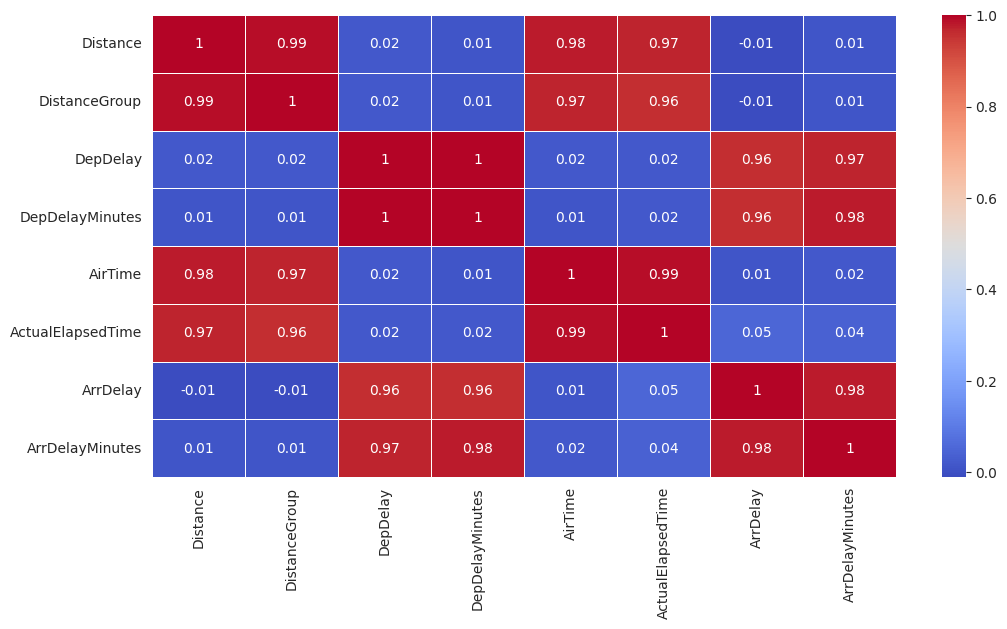

In [216]:
# Cria um mapa de calor com a matriz de correção criada acima.
ax = sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
ax.figure.set_size_inches(12, 6)

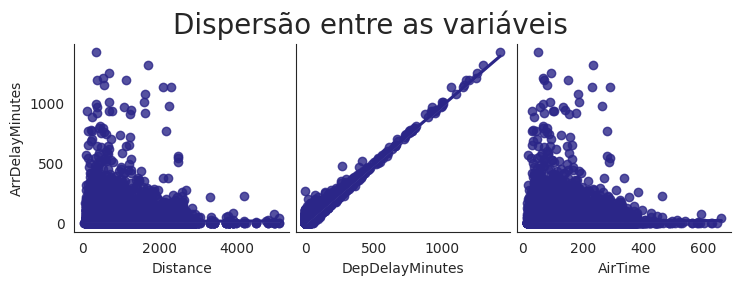

In [217]:
# Cria um gráfico de dispersão com a variável consumo e as outras variáveis do dataframe, incluindo um reta regressão.
ax = sns.pairplot(dados, y_vars='ArrDelayMinutes', x_vars=['Distance', 'DepDelayMinutes', 'AirTime'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
ax

# Modelagem

Construa um modelo de regressão linear em que queremos estimar o
tempo de atraso de um voo. Lembre-se de construir variáveis dummy a
partir de categorias como: mês do ano e rotas específicas.

In [218]:
# Importar as ferramentas da biblioteca scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [219]:
# Cria uma series com a variável dependente.
y = tempo_atraso['ArrDelayMinutes']

# Cria um dataframe com as variáveis explicativas.
X = tempo_atraso[['Distance', 'DepDelayMinutes', 'AirTime']]

# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os elementos da listas acimas com as variáveis do dataframe.
# O parâmetro test_size informa que 30% serão selecionados de forma aleatória para a realização de testes do modelo, e o restante será para treino (70%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Utiliza a função LinearRegression() para instanciar o modelo.
modelo = LinearRegression()

# Utiliza o método fit() para estimar o modelo com dados passados como parâmetro.
modelo.fit(X_train, y_train)

LinearRegression()

# Métricas do modelo

In [220]:
# Calcula o coeficiente de determinação com os dados de traino, utilizando o método score().
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.96


In [221]:
# Calcula o intercepto do modelo, considerando as variáveis explicativas igual a 0.
modelo.intercept_

-2.9429048948393355

In [222]:
# Calcula o coeficiente de regressão das variáveis, que mede a variação no valor médio da variável dependente com relação apenas uma variável explicativa.
modelo.coef_

# Cria uma lista com os nomes das variáveis para ser usada como index.
index = ['Distance', 'DepDelayMinutes', 'AirTime']

# Cria um dataframe com os coeficiente de regressão para todas as variáveis independentes.
pd.DataFrame(data=(modelo.coef_), index=index, columns=['Parâmetros']).round(2)

,Parâmetros
Distance,-0.02
DepDelayMinutes,0.98
AirTime,0.20


## Previões com os dados de teste

In [223]:
# Cria uma previsão utilizando o método predict().
y_previsto = modelo.predict(X_test)

## Métricas da previsão

In [224]:
# Calcula o erro quadrático médio, raíz do erro quadrático médio e R² do primeiro modelo.
# EQM e REQM mais baixos é um indicador que o medelos está mais ajustado.
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)

# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.
R2 = metrics.r2_score(y_test, y_previsto).round(2)

# Cria um dataframe com as métricas calculadas acima.
pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,79.83
REQM,8.93
R²,0.96


## Simulador

In [172]:
# Importa a biblioteca.
import pickle

In [226]:
# Processo de output e criação de arquivo binário no qual será salvo o modelo estimado.
output = open('/modelo_tempo_atraso', 'wb')
pickle.dump(modelo, output)
output.close() # Fecha o bloco de código.

In [168]:
# Processo de input abrir e ler o modelo estimado.
modelo = open('/modelo_tempo_atraso','rb')
lm_new = pickle.load(modelo)
modelo.close()

In [169]:
# Importa as bibliotecas para criar o formulário.
from ipywidgets import widgets, Layout, HBox, VBox
from IPython.display import display

In [170]:
# Define o estilo de largura da descrição.
style = {'description_width': 'initial'}

# Define um layout para os controles do formulário.
layout = Layout(
    display='flex',
    flex_flow='column',
    justify_content='space-between',
    width='55%'
)

# Cria os controles do formulário.
Distance = widgets.Text(description="Distância entre aeroportos (milhas):", style=style , layout=layout)
DepDelayMinutes = widgets.Text(description="Diferença entre partida programado e o real (minutos):", style=style, layout=layout)
AirTime = widgets.Text(description="Tempo de voo (minutos):", style=style, layout=layout)

# Cria o botão do formulário.
botao = widgets.Button(description="Simular")

# Posiciona os controles.
left = VBox([Distance, DepDelayMinutes, AirTime])
inputs = HBox([left])

# Função de simulação.
def simulador(sender):
    entrada=[[
                float(Distance.value if Distance.value else 0),
                float(DepDelayMinutes.value if DepDelayMinutes.value else 0),
                float(AirTime.value if AirTime.value else 0)

             ]]
    print('{0:.2f} tempo de atraso de voo em minutos.'.format(lm_new.predict(entrada)[0]))

# Atribui a função "simulador" ao evento click do botão.
botao.on_click(simulador)

# Exibe os controles de inputs e botão,
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())